In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
print(df.info())

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 no

In [3]:
# Hence, we see that there are 16 columns and 48895 rows
# Missing values are there in columns: name, host_name, last_review, reviews_per_month. 
# ID, name and host_name column has no affect on Price. Hence can be removed
df1 = df.drop(['id', 'name', 'host_name'],axis=1)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB
None


In [4]:
# now we have null values in last_review and reviews_per_month
df1.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# number of null values in last_review and reviews_per_months is same. hence there seems to be a relation. However, we cannot imput 
# last_review but we can for reviews_per_month
df1.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df1.loc[df1['reviews_per_month'].isnull(),'reviews_per_month']=0
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB


In [7]:
# remove last_review as we have dealt with reviews_per_month by imputing missing values with 0
df1 = df1.drop(['last_review','latitude' , 'longitude','number_of_reviews','reviews_per_month','neighbourhood'],axis = 1)
df1.head()

,host_id,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Private room,149,1,6,365
1,2845,Manhattan,Entire home/apt,225,1,2,355
2,4632,Manhattan,Private room,150,3,1,365
3,4869,Brooklyn,Entire home/apt,89,1,1,194
4,7192,Manhattan,Entire home/apt,80,10,1,0


In [8]:
# analyse the statistics of price group by neighbourhood. we observe there is minimum price as 0
df1.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [9]:
# analyse the statistics of minimum nights group by neighbourhood
df1.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,4.560953,15.631792,1.0,1.0,2.0,3.0,365.0
Brooklyn,20104.0,6.056556,17.632726,1.0,2.0,3.0,5.0,999.0
Manhattan,21661.0,8.579151,24.050857,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [10]:
# As price cannot be 0 and minimum nights cannot be more than 365; hence we remove these rows
df1 = df1[df1['price']>0]
df1 = df1[df1['minimum_nights']<=365]
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48870 entries, 0 to 48894
Data columns (total 7 columns):
host_id                           48870 non-null int64
neighbourhood_group               48870 non-null object
room_type                         48870 non-null object
price                             48870 non-null int64
minimum_nights                    48870 non-null int64
calculated_host_listings_count    48870 non-null int64
availability_365                  48870 non-null int64
dtypes: int64(5), object(2)
memory usage: 3.0+ MB


,host_id,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Private room,149,1,6,365
1,2845,Manhattan,Entire home/apt,225,1,2,355
2,4632,Manhattan,Private room,150,3,1,365
3,4869,Brooklyn,Entire home/apt,89,1,1,194
4,7192,Manhattan,Entire home/apt,80,10,1,0


In [11]:
# analyse the statistics of availability_365 as per neighbourhood
df1.groupby('neighbourhood_group')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,165.794495,135.304079,0.0,37.0,148.0,313.75,365.0
Brooklyn,20089.0,100.159739,126.243695,0.0,0.0,28.0,188.00,365.0
Manhattan,21654.0,111.929667,132.641048,0.0,0.0,36.0,230.00,365.0
Queens,5664.0,144.422493,135.528910,0.0,2.0,98.0,286.00,365.0
Staten Island,373.0,199.678284,131.852000,0.0,78.0,219.0,333.00,365.0


In [12]:
# now data is ready for prediction. Calculate pairwise correlation matrix to see how 
#different variables are related to price
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,host_id,price,minimum_nights,calculated_host_listings_count,availability_365
host_id,1,0.015,-0.019,0.15,0.2
price,0.015,1,0.054,0.057,0.082
minimum_nights,-0.019,0.054,1,0.16,0.16
calculated_host_listings_count,0.15,0.057,0.16,1,0.23
availability_365,0.2,0.082,0.16,0.23,1


In [13]:
# one hot encoding for categorical variables using get dummies
df1 = pd.get_dummies(df1,prefix_sep='_', drop_first=True)
df1.head()




,host_id,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,2787,149,1,6,365,1,0,0,0,1,0
1,2845,225,1,2,355,0,1,0,0,0,0
2,4632,150,3,1,365,0,1,0,0,1,0
3,4869,89,1,1,194,1,0,0,0,0,0
4,7192,80,10,1,0,0,1,0,0,0,0


In [14]:
# VIF calculation
# pd.DataFrame(np.linalg.inv(df1.corr().values), index = corr.index, columns=corr.columns)

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)



,host_id,price,minimum_nights,calculated_host_listings_count,availability_365
host_id,1.062327,0.003641,0.074199,-0.131834,-0.199056
price,0.003641,1.009692,-0.036715,-0.037068,-0.068998
minimum_nights,0.074199,-0.036715,1.051866,-0.144848,-0.152445
calculated_host_listings_count,-0.131834,-0.037068,-0.144848,1.089397,-0.192347
availability_365,-0.199056,-0.068998,-0.152445,-0.192347,1.114710


In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df1.drop('price', axis=1)
print(X.head())

Price = df1['price']
#Features_train, Features_test, Price_train, Price_test = train_test_split(Features, Price, test_size=0.30, random_state=42)
X_train, X_test, Price_train, Price_test = train_test_split(X, Price, test_size=0.3, random_state=42)

   host_id  minimum_nights  calculated_host_listings_count  availability_365  \
0     2787               1                               6               365   
1     2845               1                               2               355   
2     4632               3                               1               365   
3     4869               1                               1               194   
4     7192              10                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                             1                              0   
1                             0                              1   
2                             0                              1   
3                             1                              0   
4                             0                              1   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                           0                         

In [16]:
print("X", X.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X (48870, 10)
X_train: (34209, 10)
X_test: (14661, 10)


In [17]:
from sklearn.linear_model import LinearRegression

print("\nLINEAR (subset)")
rgr = LinearRegression(normalize=True)
rgr.fit(X_train, Price_train)
print("model:", rgr)
print("coeffs:", rgr.coef_)
print("intercept:", rgr.intercept_)

#Evaluate the predictions of the model
Price_predictions_regression = rgr.predict(X_test)
print('R squared:', rgr.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])

Price_predictions_regression




LINEAR (subset)
model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
coeffs: [ 7.43286148e-08 -6.86228986e-02 -7.82063170e-02  1.66848499e-01
  3.63716237e+01  9.01283328e+01  1.03842922e+01  6.89954215e+00
 -1.12173581e+02 -1.44025576e+02]
intercept: 127.75135455687848
R squared: 0.07456736718523937
[105.67043297 218.32571631 266.41993338 166.79496969 265.6278179
 158.83487932 222.6720362  167.83606017 121.9018111  110.98039913]
9630      45
3794      85
16206    192
16899    120
12274    190
23433     79
20771    165
41065     99
42025     44
16440     65
Name: price, dtype: int64


array([105.67043297, 218.32571631, 266.41993338, ..., 257.56854294,
        75.44034537, 219.02369683])

In [18]:
print("\n\nRIDGE")
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, Price_train)
print("model:", ridge)
print("ridge coeffs:", ridge.coef_)
print("ridge intercept:", ridge.intercept_)
Price_predictions = ridge.predict(X_test)
print('Ridge R squared:', ridge.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])




RIDGE
model: Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
ridge coeffs: [ 7.40325630e-08 -6.78087168e-02 -7.74171651e-02  1.66534710e-01
  3.49305023e+01  8.86697827e+01  8.96808298e+00  5.51731234e+00
 -1.12064865e+02 -1.43843277e+02]
ridge intercept: 129.1548698546561
Ridge R squared: 0.0745694760986475
[105.67043297 218.32571631 266.41993338 166.79496969 265.6278179
 158.83487932 222.6720362  167.83606017 121.9018111  110.98039913]
9630      45
3794      85
16206    192
16899    120
12274    190
23433     79
20771    165
41065     99
42025     44
16440     65
Name: price, dtype: int64


In [19]:
print("\n\nLASSO")
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, Price_train)
print(lasso)
print("Lasso coeffs:", lasso.coef_)
print("Lasso intercept:", lasso.intercept_)
Price_predictions = lasso.predict(X_test)
print('Lasso R squared:', lasso.score(X_test, Price_test))
print(Price_predictions[:10])
print(Price_test[:10])



LASSO
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso coeffs: [ 7.03826053e-08 -5.42669458e-02 -6.79141444e-02  1.64088822e-01
  2.60007078e+01  7.97673279e+01  0.00000000e+00 -6.68218924e-01
 -1.11715906e+02 -1.42570760e+02]
Lasso intercept: 138.02692973504307
Lasso R squared: 0.07459532135764924
[106.37209755 218.27631205 266.6499198  166.14853333 264.7593449
 158.02866392 221.37273957 167.69312465 121.57036728 111.10020465]
9630      45
3794      85
16206    192
16899    120
12274    190
23433     79
20771    165
41065     99
42025     44
16440     65
Name: price, dtype: int64


In [20]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from math import sqrt



In [21]:
pipelines = {
    "rf": make_pipeline(StandardScaler(), ensemble.RandomForestRegressor(random_state=123)),
    "gb": make_pipeline(StandardScaler(), ensemble.GradientBoostingRegressor(random_state=123))
}




In [22]:
rf_hyperparameters = {
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_features": ["auto", "sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingregressor__n_estimators": [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}
hyperparameters = {"rf": rf_hyperparameters,
                   "gb": gb_hyperparameters}


In [23]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1, verbose= 10)
    model.fit(X_train, Price_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.7min finished


rf has been fitted.
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

gb has been fitted.


In [24]:
 for name, model in fitted_models.items():
    print(name)
    print("-----------")
    pred = model.predict(X_test)
    #print('MAE:', mean_absolute_error(Price_test, pred))
    print("MSE:", "\n", mean_squared_error(Price_test, pred))
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value = ', error)

rf
-----------
MSE: 
 63273.96506520632
gb
-----------
MSE: 
 60294.19457574797


In [25]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)



In [26]:
#import required packages
from sklearn import neighbors
#from math import sqrt
%matplotlib inline

In [27]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Price_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 302.60086461961004
RMSE value for k=  2 is: 275.5334190176692
RMSE value for k=  3 is: 266.98469873442684
RMSE value for k=  4 is: 262.6819343716183
RMSE value for k=  5 is: 258.56686274288234
RMSE value for k=  6 is: 256.9420882579444
RMSE value for k=  7 is: 256.1447628914215
RMSE value for k=  8 is: 255.26272534804085
RMSE value for k=  9 is: 255.1566881207575
RMSE value for k=  10 is: 254.84625089663612
RMSE value for k=  11 is: 254.37164737452508
RMSE value for k=  12 is: 253.76559609935796
RMSE value for k=  13 is: 253.35319795685828
RMSE value for k=  14 is: 253.45942173586744
RMSE value for k=  15 is: 253.31348070599287
RMSE value for k=  16 is: 252.93055228104785
RMSE value for k=  17 is: 252.588846282477
RMSE value for k=  18 is: 252.6406847459319
RMSE value for k=  19 is: 252.7025987029259
RMSE value for k=  20 is: 252.69619223260202


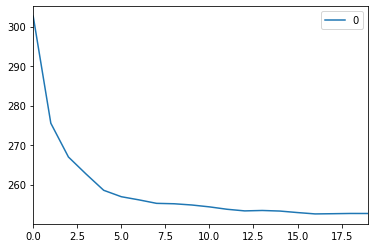

In [31]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
